Initial Data:
shape: (5, 36)
┌──────┬───────┬─────┬─────────────┬───┬───────────────────┬──────────────────┬───────────────────┬─────────────────┐
│ YEAR ┆ MONTH ┆ DAY ┆ DAY_OF_WEEK ┆ … ┆ AVG_AIRPORT_DELAY ┆ AVG_FLIGHT_DELAY ┆ HOURLY_DEPARTURES ┆ HOURLY_ARRIVALS │
│ ---  ┆ ---   ┆ --- ┆ ---         ┆   ┆ ---               ┆ ---              ┆ ---               ┆ ---             │
│ i64  ┆ i64   ┆ i64 ┆ i64         ┆   ┆ f64               ┆ f64              ┆ i64               ┆ i64             │
╞══════╪═══════╪═════╪═════════════╪═══╪═══════════════════╪══════════════════╪═══════════════════╪═════════════════╡
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ 0.056773          ┆ 0.179073         ┆ 1238              ┆ 6               │
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ 0.177824          ┆ 0.156011         ┆ 2775              ┆ 4               │
│ 2015 ┆ 1     ┆ 1   ┆ 4           ┆ … ┆ 0.18649           ┆ 0.114355         ┆ 1641              ┆ 194             │
│ 2015 ┆ 1     ┆ 1   ┆ 4   

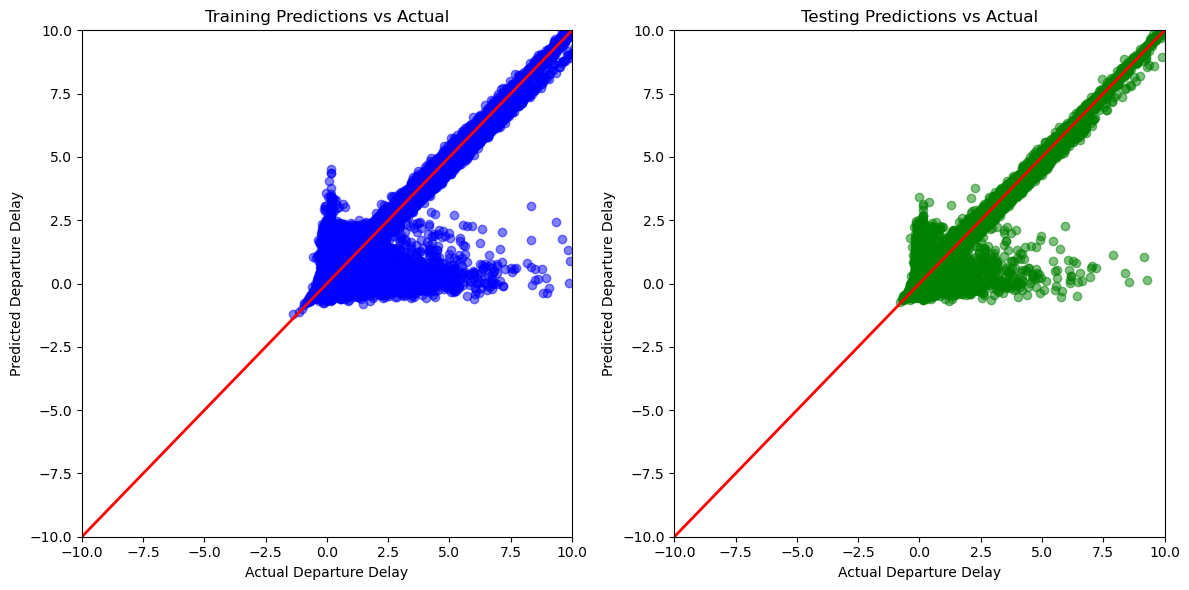

In [4]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset using Polars
df = pl.read_csv('flights_featured.csv')

# Display the initial DataFrame
print("Initial Data:")
print(df.head())

# Handle missing values in numerical columns
num_cols = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 
            'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT', 
            'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 
            'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 
            'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 
            'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
            'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEPARTURE_HOUR', 
            'AVG_AIRLINE_DELAY', 'AVG_AIRPORT_DELAY', 'AVG_FLIGHT_DELAY', 
            'HOURLY_DEPARTURES', 'HOURLY_ARRIVALS']

df = df.with_columns([
    pl.col(col).fill_null(pl.col(col).mean()).alias(col) for col in num_cols
])

# Handle missing values in categorical columns
encoded_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
                'DIVERTED', 'CANCELLED', 'SEASON']

df = df.with_columns([
    pl.col(col).fill_null(pl.col(col).median()).alias(col) for col in encoded_cols
])

# Check for any remaining missing values in the DataFrame
print("Missing Values After Imputation:")
print(df.null_count())

# Separate features and target variable
X = df.select(pl.all().exclude("DEPARTURE_DELAY"))  # Exclude target variable
y = df["DEPARTURE_DELAY"].to_numpy()  # Convert to NumPy array

# Check for NaN values in the target variable
if np.isnan(y).any():
    print("Warning: Target variable contains NaN values. Handling them...")
    # Impute missing values in y with the mean
    y = np.where(np.isnan(y), np.nanmean(y), y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.2, random_state=42)

# Scale the features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple model (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plotting training vs actual predictions
plt.figure(figsize=(12, 6))

# Plot for training predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, model.predict(X_train_scaled), color='blue', alpha=0.5)
plt.title('Training Predictions vs Actual')
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.plot([-10, 10], [-10, 10], color='red', linewidth=2)  # Diagonal line
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Plot for test predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_scaled, color='green', alpha=0.5)
plt.title('Testing Predictions vs Actual')
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.plot([-10, 10], [-10, 10], color='red', linewidth=2)  # Diagonal line
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()


Adding_Outliers. Not helping the model

In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset using Polars
df = pl.read_csv('flights_featured.csv')

# Display the initial DataFrame
print("Initial Data:")
print(df.head())

# Handle missing values in numerical columns
num_cols = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 
            'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT', 
            'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 
            'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 
            'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 
            'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 
            'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEPARTURE_HOUR', 
            'AVG_AIRLINE_DELAY', 'AVG_AIRPORT_DELAY', 'AVG_FLIGHT_DELAY', 
            'HOURLY_DEPARTURES', 'HOURLY_ARRIVALS']

df = df.with_columns([
    pl.col(col).fill_null(pl.col(col).mean()).alias(col) for col in num_cols
])

# Handle missing values in categorical columns
encoded_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
                'DIVERTED', 'CANCELLED', 'SEASON']

df = df.with_columns([
    pl.col(col).fill_null(pl.col(col).median()).alias(col) for col in encoded_cols
])

# Check for any remaining missing values in the DataFrame
print("Missing Values After Imputation:")
print(df.null_count())

# Calculate IQR for DEPARTURE_DELAY to identify outliers
Q1 = df['DEPARTURE_DELAY'].quantile(0.25)
Q3 = df['DEPARTURE_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the DataFrame
df_filtered = df.filter((pl.col('DEPARTURE_DELAY') >= lower_bound) & (pl.col('DEPARTURE_DELAY') <= upper_bound))

# Separate features and target variable
X = df_filtered.select(pl.all().exclude("DEPARTURE_DELAY"))  # Exclude target variable
y = df_filtered["DEPARTURE_DELAY"].to_numpy()  # Convert to NumPy array

# Check for NaN values in the target variable
if np.isnan(y).any():
    print("Warning: Target variable contains NaN values. Handling them...")
    # Impute missing values in y with the mean
    y = np.where(np.isnan(y), np.nanmean(y), y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.2, random_state=42)

# Scale the features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple model (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_scaled = model.predict(X_train_scaled)

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Calculate Mean Absolute Error for both training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred_scaled)
mae_test = mean_absolute_error(y_test, y_pred_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (Test): {mse}')
print(f'Mean Absolute Error (Train): {mae_train}')
print(f'Mean Absolute Error (Test): {mae_test}')
print(f'R² Score: {r2}')

# Plotting training vs actual predictions
plt.figure(figsize=(12, 6))

# Plot for training predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_scaled, color='blue', alpha=0.5)
plt.title('Training Predictions vs Actual')
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.plot([-10, 10], [-10, 10], color='red', linewidth=2)  # Diagonal line
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Plot for test predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_scaled, color='green', alpha=0.5)
plt.title('Testing Predictions vs Actual')
plt.xlabel('Actual Departure Delay')
plt.ylabel('Predicted Departure Delay')
plt.plot([-10, 10], [-10, 10], color='red', linewidth=2)  # Diagonal line
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.tight_layout()
plt.show()


In [2]:
df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SEASON,DEPARTURE_HOUR,AVG_AIRLINE_DELAY,AVG_AIRPORT_DELAY,AVG_FLIGHT_DELAY,HOURLY_DEPARTURES,HOURLY_ARRIVALS
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2015.0,1.0,1.0,4.0,7.0,98.0,434.0,523.0,0.08,23.9,-0.18,0.35,0.25,3.42,3.23,2.82,1448.0,4.07,0.07,4.5,4.13,-0.37,0.0,0.0,0.22473,0.001269,0.316189,0.391228,0.04859,1.0,0.0,0.029761,0.056773,0.179073,1238.0,6.0
2015.0,1.0,1.0,4.0,1.0,2336.0,142.0,325.0,0.17,0.03,-0.13,0.2,0.23,4.67,4.65,4.38,2330.0,7.62,0.07,7.83,7.68,-0.15,0.0,0.0,0.22473,0.001269,0.316189,0.391228,0.04859,1.0,0.0,0.148333,0.177824,0.156011,2775.0,4.0
2015.0,1.0,1.0,4.0,2.0,840.0,111.0,212.0,0.33,0.3,-0.03,0.27,0.57,4.77,4.88,4.43,2296.0,8.0,0.18,8.1,8.18,0.08,0.0,0.0,0.22473,0.001269,0.316189,0.391228,0.04859,1.0,0.0,0.102332,0.18649,0.114355,1641.0,194.0
2015.0,1.0,1.0,4.0,1.0,258.0,142.0,628.0,0.33,0.25,-0.08,0.25,0.5,4.75,4.68,4.3,2342.0,7.8,0.13,8.08,7.93,-0.15,0.0,0.0,0.22473,0.001269,0.316189,0.391228,0.04859,1.0,0.0,0.148333,0.177824,0.106675,2775.0,13.0
2015.0,1.0,1.0,4.0,7.0,135.0,190.0,184.0,0.42,0.4,-0.02,0.18,0.58,3.92,3.58,3.32,1448.0,2.9,0.08,3.33,2.98,-0.35,0.0,0.0,0.22473,0.001269,0.316189,0.391228,0.04859,1.0,0.0,0.029761,0.113325,0.224557,1291.0,11.0


In [3]:
df.shape

(5819079, 36)

In [1]:
import polars as pl

# Load the dataset using Polars
df = pl.read_csv('flights_featured.csv')

# Check for duplicate rows
duplicate_count = df.shape[0] - df.unique().shape[0]
print(f'Duplicate rows: {duplicate_count}')

# Check for missing values
missing_values = df.null_count()
print("Missing Values Count:")
print(missing_values)

# Check unique values in categorical columns
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DIVERTED', 'CANCELLED', 'SEASON']
for col in categorical_cols:
    unique_count = df[col].unique().shape[0]
    print(f'Unique values in {col}: {unique_count}')


Duplicate rows: 0
Missing Values Count:
shape: (1, 36)
┌──────┬───────┬─────┬─────────────┬───┬───────────────────┬──────────────────┬───────────────────┬─────────────────┐
│ YEAR ┆ MONTH ┆ DAY ┆ DAY_OF_WEEK ┆ … ┆ AVG_AIRPORT_DELAY ┆ AVG_FLIGHT_DELAY ┆ HOURLY_DEPARTURES ┆ HOURLY_ARRIVALS │
│ ---  ┆ ---   ┆ --- ┆ ---         ┆   ┆ ---               ┆ ---              ┆ ---               ┆ ---             │
│ u32  ┆ u32   ┆ u32 ┆ u32         ┆   ┆ u32               ┆ u32              ┆ u32               ┆ u32             │
╞══════╪═══════╪═════╪═════════════╪═══╪═══════════════════╪══════════════════╪═══════════════════╪═════════════════╡
│ 0    ┆ 0     ┆ 0   ┆ 0           ┆ … ┆ 0                 ┆ 4                ┆ 0                 ┆ 0               │
└──────┴───────┴─────┴─────────────┴───┴───────────────────┴──────────────────┴───────────────────┴─────────────────┘
Unique values in AIRLINE: 14
Unique values in ORIGIN_AIRPORT: 628
Unique values in DESTINATION_AIRPORT: 629
Unique valu